# 결정 트리 예제

In [0]:
from sklearn.datasets import load_iris
X = iris.data[:,:2]
y = iris.target

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# 그래프 그리기

In [0]:
!pip install graphviz

In [0]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(clf, out_file = "./iris.dot",feature_names = iris.feature_names[:2],class_names = iris.target_names,filled = True)

In [0]:
with open("./iris.dot") as f:
  dot_graph = str(open("./iris.dot","rb").read(),"utf8")

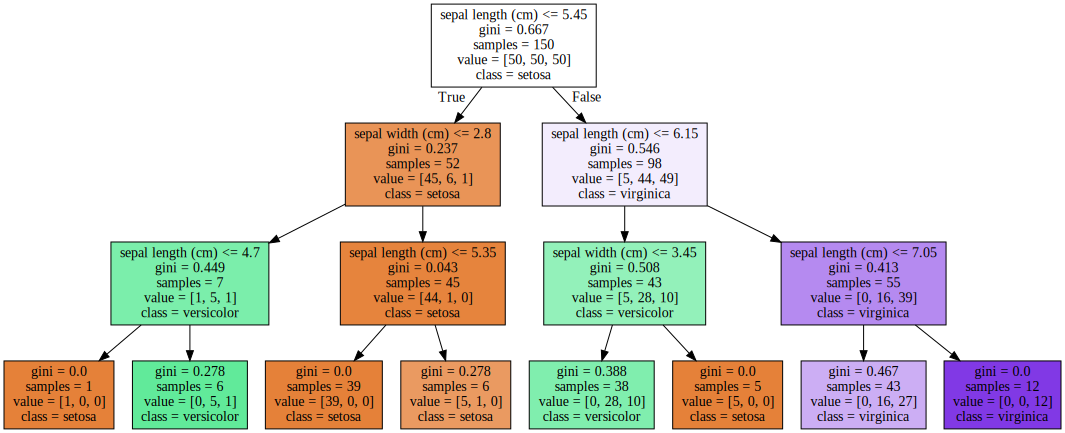

In [0]:
graphviz.Source(dot_graph)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

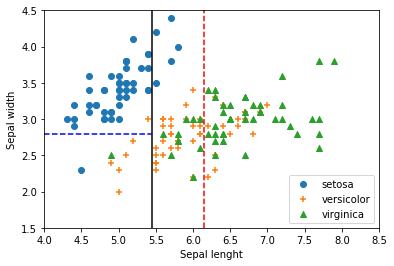

In [0]:
plt.xlim(4, 8.5)
plt.ylim(1.5, 4.5)

markers = ['o','+','^']
for i in range(3):
  xs = X[:,0][y == i]
  ys = X[:,1][y == i]
  plt.scatter(xs,ys,marker = markers[i])

plt.legend(iris.target_names)
plt.xlabel("Sepal lenght")
plt.ylabel("Sepal width")

xx = np.linspace(5.45, 5.45, 20)
yy = np.linspace(1.5,4.5,20)
plt.plot(xx,yy,'-k') # 검정색 실선

xx = np.linspace(4,5.45,20)
yy = np.linspace(2.8,2.8,20)
plt.plot(xx,yy,'--b') # 파란선

xx = np.linspace(6.15,6.15,20)
yy = np.linspace(1.5,4.5,20)


# 클래스 확률

In [0]:
print(clf.predict([[5.5,4]]))

[1]


In [0]:
print(clf.predict_proba([[5.5,4]]))

[[0.11627907 0.65116279 0.23255814]]


# 판별 기준

* 엔트로피
* 지니계수

# 유방암 분류

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [0]:
cancer = load_breast_cancer()
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))

0.916083916083916


In [0]:
list(zip(cancer.feature_names,
        clf.feature_importances_.round(4)))[:10]

[('mean radius', 0.0),
 ('mean texture', 0.0417),
 ('mean perimeter', 0.0),
 ('mean area', 0.0),
 ('mean smoothness', 0.0),
 ('mean compactness', 0.0),
 ('mean concavity', 0.0),
 ('mean concave points', 0.0426),
 ('mean symmetry', 0.0114),
 ('mean fractal dimension', 0.0)]

In [0]:
df = pd.DataFrame({'feature':cancer.feature_names,'importance':clf.feature_importances_})
df = df.sort_values('importance',ascending=False)
print(df.head(10))

                 feature  importance
22       worst perimeter    0.694689
27  worst concave points    0.121068
7    mean concave points    0.042647
1           mean texture    0.041720
21         worst texture    0.039639
13            area error    0.017216
20          worst radius    0.017188
15     compactness error    0.012042
8          mean symmetry    0.011405
14      smoothness error    0.002385


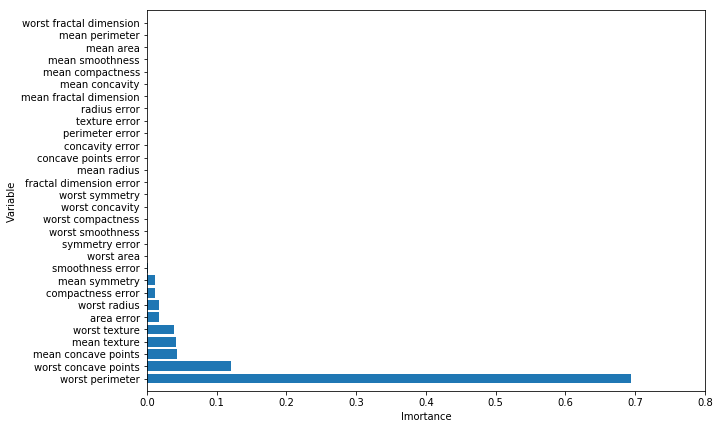

In [0]:
x = df.feature
y = df.importance
ypos = np.arange(len(x))

plt.figure(figsize = (10,7))
plt.barh(x,y)
plt.yticks(ypos,x)
plt.xlabel('Imortance')
plt.ylabel('Variable')
plt.xlim(0,0.8)
plt.ylim(-1,len(x))
plt.show()